In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../data/cleaned_data.csv")
print("Shape:", df.shape)
df.head()

Shape: (101766, 36)


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,glyburide,pioglitazone,rosiglitazone,acarbose,tolazamide,insulin,glyburide-metformin,change,diabetesMed,readmit_binary
0,Caucasian,Female,5.0,6,25,1,1,Other,41,0,...,0,0,0,0,0,0,0,0,0,0
1,Caucasian,Female,15.0,1,1,7,3,Unknown,59,0,...,0,0,0,0,0,2,0,1,1,0
2,AfricanAmerican,Female,25.0,1,1,7,2,Unknown,11,5,...,0,0,0,0,0,0,0,0,1,0
3,Caucasian,Male,35.0,1,1,7,2,Unknown,44,1,...,0,0,0,0,0,2,0,1,1,0
4,Caucasian,Male,45.0,1,1,7,1,Unknown,51,0,...,0,0,0,0,0,1,0,1,1,0


In [3]:
X = df.drop(columns=["readmit_binary"])
y = df["readmit_binary"]

In [4]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

print("Train :", X_train.shape)
print("Validation :", X_val.shape)
print("Test :", X_test.shape)

Train : (71236, 35)
Validation : (15265, 35)
Test : (15265, 35)


In [6]:
onehot_cols = ["race", "gender", "medical_specialty", "diag_1", "diag_2", "diag_3"]
numeric_cols = [col for col in X_train.columns if col not in onehot_cols]

In [7]:
from sklearn.preprocessing import StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(handle_unknown="ignore"), onehot_cols),
        ("scale", StandardScaler(), numeric_cols)
    ]
)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [9]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "DecisionTree": DecisionTreeClassifier(class_weight='balanced', max_depth=8),
    "RandomForest": RandomForestClassifier(n_estimators=300, max_depth=10, class_weight="balanced")
}

In [10]:
from sklearn.pipeline import Pipeline

In [11]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_auc_score,
    average_precision_score, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

import joblib
import warnings
warnings.filterwarnings("ignore")

In [12]:
log_reg = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", LogisticRegression(max_iter=1000, class_weight='balanced'))
])

log_reg.fit(X_train, y_train)
val_preds = log_reg.predict(X_val)
val_probs = log_reg.predict_proba(X_val)[:, 1]

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_val, val_preds))
print("Precision:", precision_score(y_val, val_preds))
print("Recall:", recall_score(y_val, val_preds))
print("F1:", f1_score(y_val, val_preds))
print("ROC-AUC:", roc_auc_score(y_val, val_probs))


Logistic Regression:
Accuracy: 0.6653128070750082
Precision: 0.17859165565414387
Recall: 0.5551643192488263
F1: 0.2702471075560634
ROC-AUC: 0.6568875188549878


In [13]:
knn = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", KNeighborsClassifier(n_neighbors=7))
])

knn.fit(X_train, y_train)

val_preds = knn.predict(X_val)
val_probs = knn.predict_proba(X_val)[:, 1]

print("KNN:")
print("Accuracy:", accuracy_score(y_val, val_preds))
print("Precision:", precision_score(y_val, val_preds))
print("Recall:", recall_score(y_val, val_preds))
print("F1:", f1_score(y_val, val_preds))
print("ROC-AUC:", roc_auc_score(y_val, val_probs))


  File "C:\Users\Admin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Admin\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\Lib\subprocess.

KNN:
Accuracy: 0.8846380609236816
Precision: 0.3442622950819672
Recall: 0.03697183098591549
F1: 0.06677265500794913
ROC-AUC: 0.5681721835573083


In [14]:
dt = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", DecisionTreeClassifier(max_depth=8, class_weight='balanced'))
])

dt.fit(X_train, y_train)

val_preds = dt.predict(X_val)
val_probs = dt.predict_proba(X_val)[:, 1]

print("Decision Tree:")
print("Accuracy:", accuracy_score(y_val, val_preds))
print("Precision:", precision_score(y_val, val_preds))
print("Recall:", recall_score(y_val, val_preds))
print("F1:", f1_score(y_val, val_preds))
print("ROC-AUC:", roc_auc_score(y_val, val_probs))


Decision Tree:
Accuracy: 0.6159187684245004
Precision: 0.16997302015553087
Recall: 0.6285211267605634
F1: 0.2675827607745159
ROC-AUC: 0.6609126281420797


In [15]:
rf = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", RandomForestClassifier(
        n_estimators=300,
        max_depth=10,
        class_weight="balanced",
        random_state=42
    ))
])

rf.fit(X_train, y_train)

val_preds = rf.predict(X_val)
val_probs = rf.predict_proba(X_val)[:, 1]

print("Random Forest:")
print("Accuracy:", accuracy_score(y_val, val_preds))
print("Precision:", precision_score(y_val, val_preds))
print("Recall:", recall_score(y_val, val_preds))
print("F1:", f1_score(y_val, val_preds))
print("ROC-AUC:", roc_auc_score(y_val, val_probs))


Random Forest:
Accuracy: 0.6894202423845398
Precision: 0.18528497409326425
Recall: 0.5246478873239436
F1: 0.2738551079797825
ROC-AUC: 0.6712578583365097


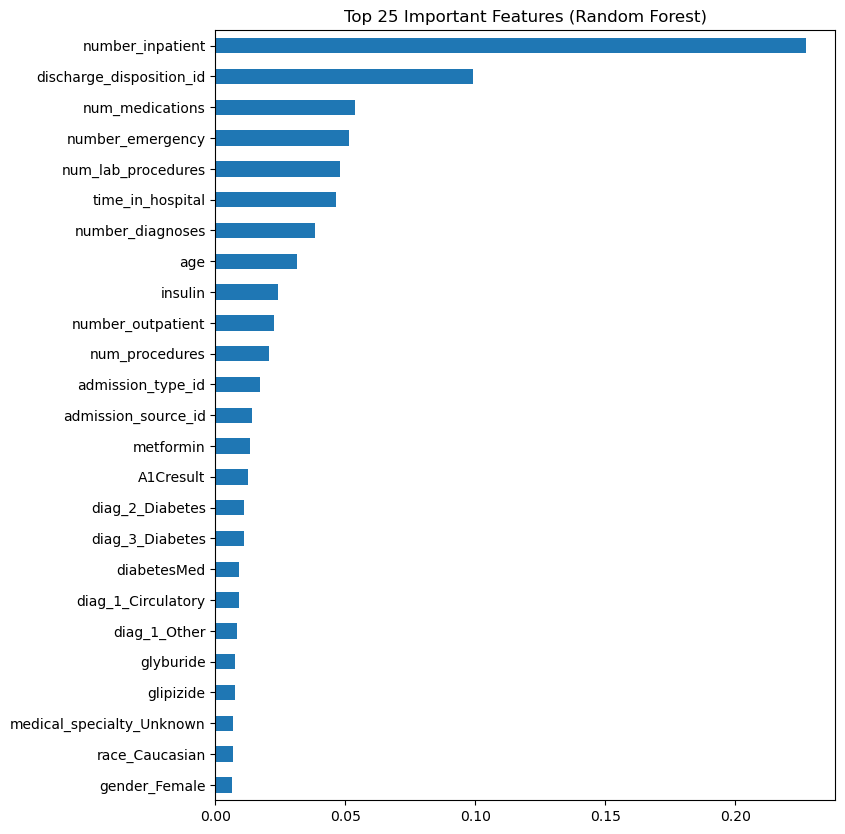

In [16]:
if "clf" in rf.named_steps:
    oh_names = rf.named_steps["preprocessor"].transformers_[0][1].get_feature_names_out(onehot_cols)
    feature_names = list(oh_names) + numeric_cols

    importances = rf.named_steps["clf"].feature_importances_
    fi = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(25)

    plt.figure(figsize=(8,10))
    fi.plot(kind='barh')
    plt.gca().invert_yaxis()
    plt.title("Top 25 Important Features (Random Forest)")
    plt.show()


In [17]:
import os 
joblib.dump(log_reg, "../models/logistic_regression.pkl")
print("Saved: logistic_regression.pkl")
joblib.dump(knn, "../models/knn.pkl")
print("Saved: knn.pkl")
joblib.dump(dt, "../models/decision_tree.pkl")
print("Saved: decision_tree.pkl")
joblib.dump(rf, "../models/random_forest.pkl")
print("Saved: random_forest.pkl")

Saved: logistic_regression.pkl
Saved: knn.pkl
Saved: decision_tree.pkl
Saved: random_forest.pkl


In [18]:
from sklearn.ensemble import VotingClassifier

In [19]:
ensemble = VotingClassifier(
    estimators=[
        ('lr', log_reg),
        ('dt', dt),
        ('rf', rf)
    ],
    voting='soft',
    weights=[1, 1, 2]  
)

In [20]:
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('onehot',
                                                                                OneHotEncoder(handle_unknown='ignore'),
                                                                                ['race',
                                                                                 'gender',
                                                                                 'medical_specialty',
                                                                                 'diag_1',
                                                                                 'diag_2',
                                                                                 'diag_3']),
                                                                               ('scale',
                                                                                StandardScaler(),
                                                                                ['age',
                                                                                 'admission_type_id',
                                                                                 'discharge_disposition_id',
                                                                                 'admission_source_id',
                                                                                 'time_in_hospital',
                                                                                 'num_lab_proced...
                                                                                 'A1Cresult',
                                                                                 'metformin',
                                                                                 'repaglinide',
                                                                                 'nateglinide',
                                                                                 'chlorpropamide',
                                                                                 'glimepiride',
                                                                                 'glipizide',
                                                                                 'glyburide',
                                                                                 'pioglitazone',
                                                                                 'rosiglitazone',
                                                                                 'acarbose',
                                                                                 'tolazamide',
                                                                                 'insulin',
                                                                                 'glyburide-metformin',
                                                                                 'change',
                                                                                 'diabetesMed'])])),
                                              ('clf',
                                               RandomForestClassifier(class_weight='balanced',
                                                                      max_depth=10,
                                                                      n_estimators=300,
                                                                      random_state=42))]))],
                 voting='soft', weights=[1, 1, 2])

In [21]:
val_preds = ensemble.predict(X_val)
val_probs = ensemble.predict_proba(X_val)[:, 1]

print("Ensemble Model:")
print("Accuracy:", accuracy_score(y_val, val_preds))
print("Precision:", precision_score(y_val, val_preds))
print("Recall:", recall_score(y_val, val_preds))
print("F1:", f1_score(y_val, val_preds))
print("ROC-AUC:", roc_auc_score(y_val, val_probs))


Ensemble Model:
Accuracy: 0.6858827382902064
Precision: 0.1908381676335267
Recall: 0.5598591549295775
F1: 0.28464866477696554
ROC-AUC: 0.6786288299815856


In [22]:
def ensemble_predict_proba(X):
    p1 = log_reg.predict_proba(X)[:, 1]
    p2 = dt.predict_proba(X)[:, 1]
    p3 = rf.predict_proba(X)[:, 1]
    return (p1 + p2 + p3) / 3

joblib.dump(ensemble_predict_proba, "../models/ensemble_predict.pkl")

print("All ensemble components saved!")

All ensemble components saved!


In [23]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
preds = dummy.predict(X_val)

print("Accuracy:", accuracy_score(y_val, preds))
print("Recall:", recall_score(y_val, preds))

Accuracy: 0.8883720930232558
Recall: 0.0


In [24]:
from sklearn.linear_model import RidgeClassifier

ridge = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", RidgeClassifier(class_weight="balanced"))
])

ridge.fit(X_train, y_train)

val_preds = ridge.predict(X_val)
val_probs = ridge.decision_function(X_val)  # convert to score

print("Ridge Classifier:")
print("Accuracy:", accuracy_score(y_val, val_preds))
print("Precision:", precision_score(y_val, val_preds))
print("Recall:", recall_score(y_val, val_preds))
print("F1:", f1_score(y_val, val_preds))
print("ROC-AUC:", roc_auc_score(y_val, val_probs))

joblib.dump(rf, "../models/ridge.pkl")
print("Saved: ridge.pkl")

Ridge Classifier:
Accuracy: 0.6628889616770389
Precision: 0.17807706696595585
Recall: 0.5586854460093896
F1: 0.2700709219858156
ROC-AUC: 0.6562386510889934
Saved: ridge.pkl


In [25]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

svc = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", CalibratedClassifierCV(
        LinearSVC(class_weight="balanced", max_iter=5000),
        method="sigmoid"
    ))
])

svc.fit(X_train, y_train)

val_preds = svc.predict(X_val)
val_probs = svc.predict_proba(X_val)[:, 1]

print("Linear SVC:")
print("Accuracy:", accuracy_score(y_val, val_preds))
print("Precision:", precision_score(y_val, val_preds))
print("Recall:", recall_score(y_val, val_preds))
print("F1:", f1_score(y_val, val_preds))
print("ROC-AUC:", roc_auc_score(y_val, val_probs))

joblib.dump(rf, "../models/linearSVC.pkl")
print("Saved: linearSVC.pkl")

Linear SVC:
Accuracy: 0.8881100556829348
Precision: 0.45652173913043476
Recall: 0.01232394366197183
F1: 0.024
ROC-AUC: 0.6565178191534478
Saved: linearSVC.pkl


In [26]:
from imblearn.over_sampling import RandomOverSampler

In [27]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(
    preprocessor.fit_transform(X_train),
    y_train
)
X_val_ros = preprocessor.transform(X_val)


In [28]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_ros, y_train_ros)

val_preds = nb.predict(X_val_ros)
val_probs = nb.predict_proba(X_val_ros)[:,1]

print("Naive Bayes:")
print("Accuracy:", accuracy_score(y_val, val_preds))
print("Precision:", precision_score(y_val, val_preds))
print("Recall:", recall_score(y_val, val_preds))
print("F1:", f1_score(y_val, val_preds))
print("ROC-AUC:", roc_auc_score(y_val, val_probs))

joblib.dump(nb, "../models/naive_bayes.pkl")
print("Saved: naive_bayes.pkl")

Naive Bayes:
Accuracy: 0.23878152636750738
Precision: 0.11826301201108716
Recall: 0.9014084507042254
F1: 0.209093384154642
ROC-AUC: 0.6078298008684806
Saved: naive_bayes.pkl


In [29]:
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier(class_weight='balanced')
ridge.fit(X_train_ros, y_train_ros)

val_preds = ridge.predict(X_val_ros)

print("Ridge Classifier:")
print("Accuracy:", accuracy_score(y_val, val_preds))
print("Precision:", precision_score(y_val, val_preds))
print("Recall:", recall_score(y_val, val_preds))
print("F1:", f1_score(y_val, val_preds))
joblib.dump(ridge, "../models/ridge(os).pkl")
print("Saved: ridge(os).pkl")

Ridge Classifier:
Accuracy: 0.6619718309859155
Precision: 0.17773218948153674
Recall: 0.5592723004694836
F1: 0.2697424285309935
Saved: ridge(os).pkl


In [30]:
from sklearn.svm import LinearSVC

svc = LinearSVC(class_weight='balanced')
svc.fit(X_train_ros, y_train_ros)

val_preds = svc.predict(X_val_ros)

print("Linear SVC:")
print("Accuracy:", accuracy_score(y_val, val_preds))
print("Precision:", precision_score(y_val, val_preds))
print("Recall:", recall_score(y_val, val_preds))
print("F1:", f1_score(y_val, val_preds))

joblib.dump(svc, "../models/linearsvc(os).pkl")
print("Saved: linearsvc(os).pkl")

Linear SVC:
Accuracy: 0.6637405830330823
Precision: 0.1770578263326427
Recall: 0.5516431924882629
F1: 0.2680735776415229
Saved: linearsvc(os).pkl


## final model - ensemble
## hyper para tuning 

In [31]:
log_params = {
    "clf__C": [0.01, 0.1, 1],
    "clf__class_weight": ["balanced"]
}
ridge_params = {
    "clf__alpha": [0.01, 0.1, 1, 10]
}
svc_params = {
    "clf__C": [0.01, 0.1, 1]
}
dt_params = {
    "clf__max_depth": [5, 8, 12],
    "clf__min_samples_split": [2, 10, 20],
    "clf__class_weight": ["balanced"]
}
rf_params = {
    "clf__n_estimators": [200, 300],
    "clf__max_depth": [8, 10, 12],
    "clf__class_weight": ["balanced_subsample", "balanced"]
}


In [32]:
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(handle_unknown="ignore"), onehot_cols),
        ("scale", StandardScaler(), numeric_cols)
    ]
)

In [33]:
log_clf = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

nb_clf = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", GaussianNB())
])

knn_clf = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", KNeighborsClassifier(n_neighbors=7))
])

rf_clf = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", RandomForestClassifier(
        n_estimators=300, max_depth=10, class_weight="balanced", random_state=42
    ))
])

In [34]:
voter = VotingClassifier(
    estimators=[
        ("lr", log_clf),
        ("nb", nb_clf),
        ("knn", knn_clf),
        ("rf", rf_clf)
    ],
    voting="soft" 
)


In [35]:
voter.fit(X_train, y_train)

val_preds = voter.predict(X_val)
val_probs = voter.predict_proba(X_val)[:, 1]

print("Accuracy:", accuracy_score(y_val, val_preds))
print("Precision:", precision_score(y_val, val_preds))
print("Recall:", recall_score(y_val, val_preds))
print("F1:", f1_score(y_val, val_preds))
print("ROC-AUC:", roc_auc_score(y_val, val_probs))

Accuracy: 0.5928594824762529
Precision: 0.1608780634491054
Recall: 0.6279342723004695
F1: 0.2561340514661879
ROC-AUC: 0.641755276886598


In [36]:
from sklearn.metrics import roc_curve, auc

y_true = y_val
y_scores = val_probs

In [37]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

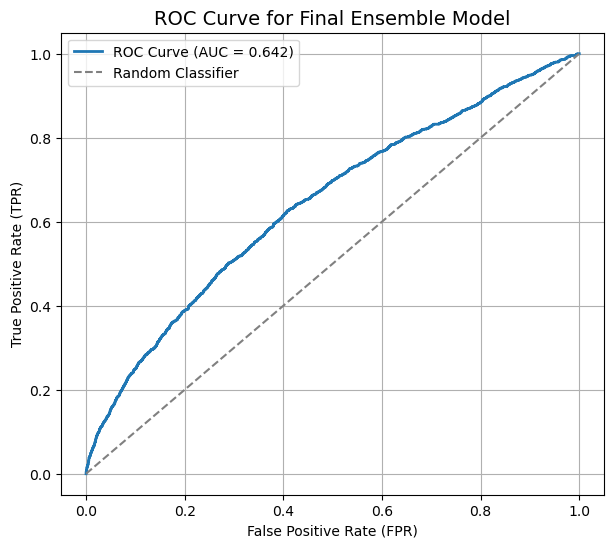

In [38]:
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})", linewidth=2)
plt.plot([0,1], [0,1], linestyle="--", color="gray", label="Random Classifier")

plt.title("ROC Curve for Final Ensemble Model", fontsize=14)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.grid(True)
plt.show()

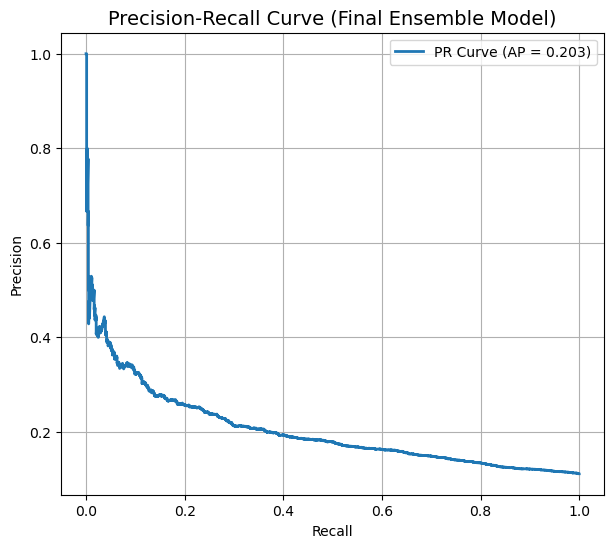

In [39]:
from sklearn.metrics import precision_recall_curve, average_precision_score

prec, rec, th = precision_recall_curve(y_true, y_scores)
ap = average_precision_score(y_true, y_scores)

plt.figure(figsize=(7,6))
plt.plot(rec, prec, linewidth=2, label=f"PR Curve (AP = {ap:.3f})")
plt.title("Precision-Recall Curve (Final Ensemble Model)", fontsize=14)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.legend()
plt.show()

In [40]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehot = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(handle_unknown="ignore"), onehot_cols)
    ],
    remainder="passthrough"
)

onehot.fit(X_train)

X_train_boost = onehot.transform(X_train)
X_val_boost = onehot.transform(X_val)
X_test_boost = onehot.transform(X_test)

print("Shape:", X_train_boost.shape)


Shape: (71236, 86)


In [41]:
cat_idx = [X_train.columns.get_loc(c) for c in onehot_cols]
cat_idx

[0, 1, 7, 14, 15, 16]

In [42]:
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
scale_pos_weight = neg / pos
scale_pos_weight

np.float64(7.960503144654088)

In [43]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train_boost, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=-1,
              num_parallel_tree=None, ...)

In [44]:
val_proba = xgb.predict_proba(X_val_boost)[:, 1]
val_pred = (val_proba >= 0.5).astype(int)

print("XGBOOST RESULTS:")
print("Accuracy:", accuracy_score(y_val, val_pred))
print("Precision:", precision_score(y_val, val_pred))
print("Recall:", recall_score(y_val, val_pred))
print("F1:", f1_score(y_val, val_pred))
print("ROC-AUC:", roc_auc_score(y_val, val_proba))
print("PR-AUC:", average_precision_score(y_val, val_proba))

XGBOOST RESULTS:
Accuracy: 0.6963642319030462
Precision: 0.19205715486446734
Recall: 0.5363849765258216
F1: 0.2828407860126876
ROC-AUC: 0.6800512845279528
PR-AUC: 0.23381302696570205


In [45]:
import lightgbm as lgb

lgbm = lgb.LGBMClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    is_unbalance=True,
    random_state=42,
    n_jobs=-1
)

lgbm.fit(X_train_boost, y_train)

[LightGBM] [Info] Number of positive: 7950, number of negative: 63286
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 526
[LightGBM] [Info] Number of data points in the train set: 71236, number of used features: 85
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111601 -> initscore=-2.074492
[LightGBM] [Info] Start training from score -2.074492


LGBMClassifier(colsample_bytree=0.8, is_unbalance=True, learning_rate=0.05,
               n_estimators=400, n_jobs=-1, random_state=42, subsample=0.8)

In [46]:
val_proba = lgbm.predict_proba(X_val_boost)[:, 1]
val_pred = (val_proba >= 0.5).astype(int)

print("LIGHTGBM RESULTS:")
print("Accuracy:", accuracy_score(y_val, val_pred))
print("Precision:", precision_score(y_val, val_pred))
print("Recall:", recall_score(y_val, val_pred))
print("F1:", f1_score(y_val, val_pred))
print("ROC-AUC:", roc_auc_score(y_val, val_proba))
print("PR-AUC:", average_precision_score(y_val, val_proba))

LIGHTGBM RESULTS:
Accuracy: 0.6858827382902064
Precision: 0.1912087912087912
Recall: 0.5616197183098591
F1: 0.28528841854225667
ROC-AUC: 0.6833001672498428
PR-AUC: 0.23627951676363618


In [47]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(
    iterations=400,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    scale_pos_weight=scale_pos_weight,
    random_seed=42,
    verbose=False
)

cat.fit(X_train, y_train, cat_features=cat_idx)

In [48]:
val_proba = cat.predict_proba(X_val)[:, 1]
val_pred = (val_proba >= 0.5).astype(int)

print("CATBOOST RESULTS:")
print("Accuracy:", accuracy_score(y_val, val_pred))
print("Precision:", precision_score(y_val, val_pred))
print("Recall:", recall_score(y_val, val_pred))
print("F1:", f1_score(y_val, val_pred))
print("ROC-AUC:", roc_auc_score(y_val, val_proba))
print("PR-AUC:", average_precision_score(y_val, val_proba))

CATBOOST RESULTS:
Accuracy: 0.6626924336717982
Precision: 0.18515810637908975
Recall: 0.5944835680751174
F1: 0.2823693379790941
ROC-AUC: 0.6842025409097409
PR-AUC: 0.23038606691953734


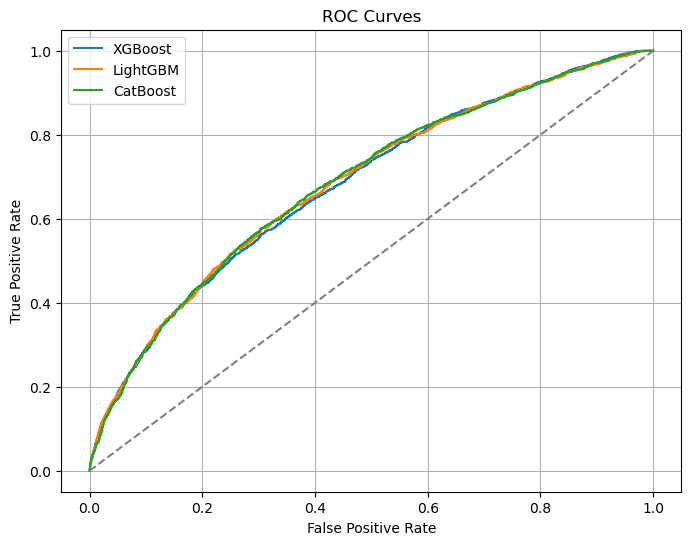

In [49]:
plt.figure(figsize=(8,6))

# XGBoost
fpr, tpr, _ = roc_curve(y_val, xgb.predict_proba(X_val_boost)[:,1])
plt.plot(fpr, tpr, label="XGBoost")

# LightGBM
fpr, tpr, _ = roc_curve(y_val, lgbm.predict_proba(X_val_boost)[:,1])
plt.plot(fpr, tpr, label="LightGBM")

# CatBoost
fpr, tpr, _ = roc_curve(y_val, cat.predict_proba(X_val)[:,1])
plt.plot(fpr, tpr, label="CatBoost")

plt.plot([0,1],[0,1],'--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid()
plt.show()

In [50]:
joblib.dump(xgb, "../models/xgboost.pkl")
print("Saved: xgboost.pkl")

Saved: xgboost.pkl


In [51]:
joblib.dump(lgbm, "../models/lightgbm.pkl")
print("Saved: lightgbm.pkl")

Saved: lightgbm.pkl


In [52]:
joblib.dump(cat, "../models/catboost.pkl")
print("Saved: catboost.pkl")

Saved: catboost.pkl


In [53]:
import joblib

joblib.dump(X_train, "../data/x_train.pkl")
joblib.dump(X_val, "../data/x_val.pkl")
joblib.dump(X_test, "../data/x_test.pkl")
joblib.dump(y_train, "../data/y_train.pkl")
joblib.dump(y_val, "../data/y_val.pkl")
joblib.dump(y_test, "../data/y_test.pkl")

print("Saved train/val/test splits!")


Saved train/val/test splits!


In [57]:
joblib.dump(voter, "../models/voter.pkl")
print("Saved: voter.pkl")

Saved: voter.pkl
